# Elementary Shortest Path Problem with Resource Constraints and Time Windows (ESPRRCTW)

In [14]:
# test using ESPPRCTW on the simple test graph.
# Note: The results can be different compared to test_ESPP because here resources are taken into account.
import networkx as nx
import logging
import numpy as np


import os
dir_notebooks = os.getcwd()
dir_home, _ = os.path.split(dir_notebooks)

#dir_data = os.path.join(dir_home, 'data')
dir_code = dir_home
#dir_scripts = os.path.join(dir_home, 'scripts')


# Import my modules
import sys
sys.path.append(dir_code) 

import pylgrim
import tests.tools as testtools

import importlib
importlib.reload(pylgrim.ESPPRCTW)

<module 'pylgrim.ESPPRCTW' from '/home/ubuntu/github_repos/pylgrim/pylgrim/ESPPRCTW.py'>

In [15]:
# possible values are: WARNING, INFO, DEBUG, ...
# (see https://docs.python.org/3/library/logging.html#logging-levels)
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

## Toy Example

In [16]:
def create_test_graph(add_nodes_to_0=False):
    """create test based on graph from [1]
    (see 'testgraph.png')
    With the flag {add_nodes_to_0} the graph can be extended with two nodes to 0"""

    # MUY LAXO POR EL MOMENTO
    AUTONOMY = 10 
    TIME_WINDOWS = [0,10]

    G = nx.DiGraph(n_res=2, max_res=[AUTONOMY,TIME_WINDOWS[1]]) #max_res [AUTONOMY, TIME_WINDOWS] 


    # Add nodes
    G.add_nodes_from([
        (0, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (1, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (2, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (3, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (4, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (5, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (6, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
    ])

    
    G.add_edge(0, 1, weight=2, res_cost=np.array([1,2]))
    G.add_edge(0, 2, weight=-4, res_cost=np.array([1,2]))
    G.add_edge(1, 2, weight=-7, res_cost=np.array([1,2]))
    G.add_edge(1, 4, weight=5, res_cost=np.array([1,3]))
    G.add_edge(2, 3, weight=3, res_cost=np.array([1,2]))
    G.add_edge(3, 1, weight=1, res_cost=np.array([1,2]))
    G.add_edge(2, 5, weight=-2, res_cost=np.array([1,2]))
    G.add_edge(5, 6, weight=2, res_cost=np.array([1,2]))
    G.add_edge(5, 4, weight=-2, res_cost=np.array([1,2]))
    G.add_edge(4, 2, weight=3, res_cost=np.array([1,2]))
    G.add_edge(4, 6, weight=3, res_cost=np.array([1,3]))
    if add_nodes_to_0:
        # add nodes to 0 for test
        G.add_edge(6, 0, weight=-1, res_cost=np.array([1,2]))
        G.add_edge(1, 0, weight=-2, res_cost=np.array([1,2]))

    return G

In [17]:
def create_test_graph(add_nodes_to_0=False):
    """create test based on graph from [1]
    (see 'testgraph.png')
    With the flag {add_nodes_to_0} the graph can be extended with two nodes to 0"""

    # MUY LAXO POR EL MOMENTO
    AUTONOMY = 10 
    TIME_WINDOWS = [0,10]

    G = nx.DiGraph(n_res=2, max_res=[AUTONOMY,TIME_WINDOWS[1]]) #max_res [AUTONOMY, TIME_WINDOWS] 


    # Add nodes
    G.add_nodes_from([
        (0, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (1, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (2, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,3]) }),
        (3, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (4, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (5, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
        (6, {"res_min": np.array([0,TIME_WINDOWS[0]]),
             "res_max": np.array([AUTONOMY,TIME_WINDOWS[1]]) }),
    ])

    
    G.add_edge(0, 1, weight=2, res_cost=np.array([1,2]))
    G.add_edge(0, 2, weight=-4, res_cost=np.array([1,2]))
    G.add_edge(1, 2, weight=-7, res_cost=np.array([1,2]))
    G.add_edge(1, 4, weight=5, res_cost=np.array([1,3]))
    G.add_edge(2, 3, weight=3, res_cost=np.array([1,2]))
    G.add_edge(3, 1, weight=1, res_cost=np.array([1,2]))
    G.add_edge(2, 5, weight=-2, res_cost=np.array([1,2]))
    G.add_edge(5, 6, weight=2, res_cost=np.array([1,2]))
    G.add_edge(5, 4, weight=-2, res_cost=np.array([1,2]))
    G.add_edge(4, 2, weight=3, res_cost=np.array([1,2]))
    G.add_edge(4, 6, weight=3, res_cost=np.array([1,3]))
    if add_nodes_to_0:
        # add nodes to 0 for test
        G.add_edge(6, 0, weight=-1, res_cost=np.array([1,2]))
        G.add_edge(1, 0, weight=-2, res_cost=np.array([1,2]))

    return G

In [18]:
# create test graph
G = create_test_graph(add_nodes_to_0=True) #testtools.create_test_graph(add_nodes_to_0=True)
source = 0
print('Testing with {} nodes'.format(len(G)))
print('')
print("Example node 0:",G.nodes[0])

Testing with 7 nodes

Example node 0: {'res_min': array([0, 0]), 'res_max': array([10, 10])}


In [19]:
# move source in-edges to a new node
source_in = 'source_in'
pylgrim.tools.decouple_source(G, source, source_in=source_in)

2

In [20]:
# solve using ESPPRCTW
#target = 4
target = source_in
max_res = G.graph["max_res"]

# optional keywords that should also work without using them
res_name = 'res_cost'

G_pre, res_min = pylgrim.ESPPRCTW.preprocess(G, source, target, max_res =max_res, res_name=res_name)
shortest_path, shortest_path_label = pylgrim.ESPPRCTW.GSSA(G_pre, source, target, max_res, res_min, res_name=res_name)


print('shortest path found: {} with label {}'.format(shortest_path, shortest_path_label))
print('')

while True:
    try:
        e = shortest_path.__next__()
        print('{} ⇨ {} : {}'.format(*e))
        print('')
    except StopIteration:
        # last element reached
        break

0
1
shortest path found: 0 ⇨ 2 ⇨ 5 ⇨ 6 ⇨ source_in with label (-5, array([4., 8.]))

0 ⇨ 2 : {'weight': -4, 'res_cost': array([1, 2])}

2 ⇨ 5 : {'weight': -2, 'res_cost': array([1, 2])}

5 ⇨ 6 : {'weight': 2, 'res_cost': array([1, 2])}

6 ⇨ source_in : {'weight': -1, 'res_cost': array([1, 2])}



In [21]:
shortest_path

0 2 5 6 source_in

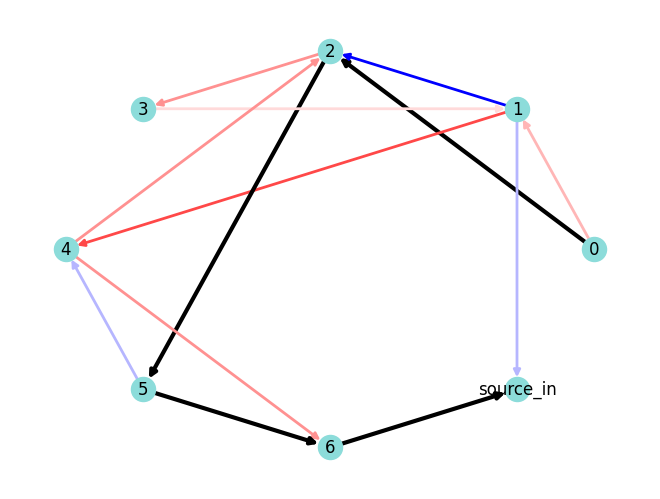

In [22]:
# visualize
testtools.visualize_path(G, shortest_path)

## Real example

In [32]:
import importlib
importlib.reload(pylgrim.ESPPRCTW)

<module 'pylgrim.ESPPRCTW' from '/home/ubuntu/github_repos/pylgrim/pylgrim/ESPPRCTW.py'>

In [33]:
import pickle
G = pickle.load(open('filename.pickle', 'rb'))

In [34]:
source = G.graph["source"]
source_in = G.graph["sink"]

print('Testing with {} nodes'.format(len(G)))
print('')
print("Start node: ", source)
print("Finish node: ", source_in)

Testing with 111 nodes

Start node:  depot_start_m_0
Finish node:  depot_end_m_0


In [41]:
for e in G.edges:
    if G.edges[e]["res_cost"][2] <= 0:
        G.edges[e]["res_cost"] = [1., 1., 1.]
    #print(e, G.edges[e]["res_cost"])
    #if e == ('detach_2_m_0', 'attach_2_m_0'):
    #    G.edges[e]["demand"] = 1

In [42]:
# solve using ESPPRCTW
#target = 4
target = source_in
max_res = G.graph["max_res"]

# optional keywords that should also work without using them
res_name = 'res_cost'

G_pre, res_min = pylgrim.ESPPRCTW.preprocess(G, source, target, max_res =max_res, res_name=res_name)
shortest_path, shortest_path_label = pylgrim.ESPPRCTW.GSSA(G_pre, source, target, max_res, res_min, res_name=res_name)


print('shortest path found: {} with label {}'.format(shortest_path, shortest_path_label))
print('')

while True:
    try:
        e = shortest_path.__next__()
        print('{} ⇨ {} : {}'.format(*e))
        print('')
    except StopIteration:
        # last element reached
        break

Calculate feasible paths to target for resource 0
Calculate feasible paths to target for resource 1
Calculate feasible paths to target for resource 2
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ubuntu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_168092/1435068969.py", line 10, in <module>
    shortest_path, shortest_path_label = pylgrim.ESPPRCTW.GSSA(G_pre, source, target, max_res, res_min, res_name=res_name)
  File "/home/ubuntu/github_repos/pylgrim/pylgrim/ESPPRCTW.py", line 320, in GSSA
    logger.debug('found path {} (C {} | R {})'.format(pt.print_path(path, max_path_len_for_print=len(path)), label[0], label[1]))
  File "/home/ubuntu/github_repos/pylgrim/pylgrim/ESPPRCTW.py", line 192, in GLSA
  File "/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/arrayprint.py", line 1612, in _array_str_implementation
    return array2string(a, max_line_width, precision, suppress_small, ' ', "")
  File "/home/ubuntu/.local/lib/python3.10/site-packages/numpy/core/arrayprint.py", line 736, in array2string